# Project Notebook: Introduction to Postgres

## 1. Introduction

In the past, we learned the basics of Postgres, including the following:

* How to create a database and manage database roles
* How to create database schemas and tables with the proper datatypes
* How to load data from CSV files into database tables

In this project, we will put everything together to build a database for storing data related to crimes that occurred in Boston. This dataset is available in the file `boston.csv` (https://bit.ly/3zN70qB).

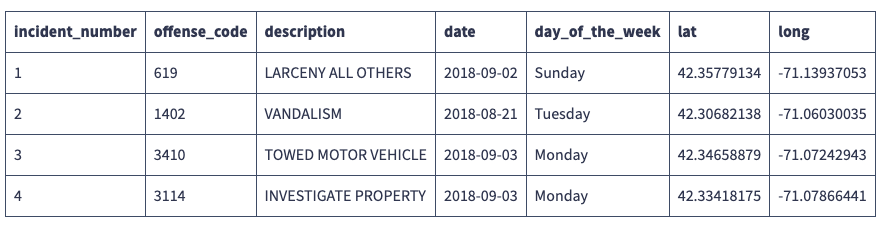

The first column represents the identifier of the crime. The second contains a numeric identifier code for the committed crime. The third represents a description of the crime. The next two rows contain the date when the crime happened and the corresponding day of the week. Finally, the last two columns represent the location of the crime with latitude and longitude coordinates.

The goal of this project is to create a database named `crimes_db-yourname` with a table – boston_crimes – with appropriate datatypes for storing the data from the `boston.csv` file. You will be creating the table inside a schema named crimes. You will also create the readonly and readwrite groups with the appropriate privileges. Finally, you will also need to create one user for each of these groups.

The following diagram illustrates a high-level overview of what we want to achieve:

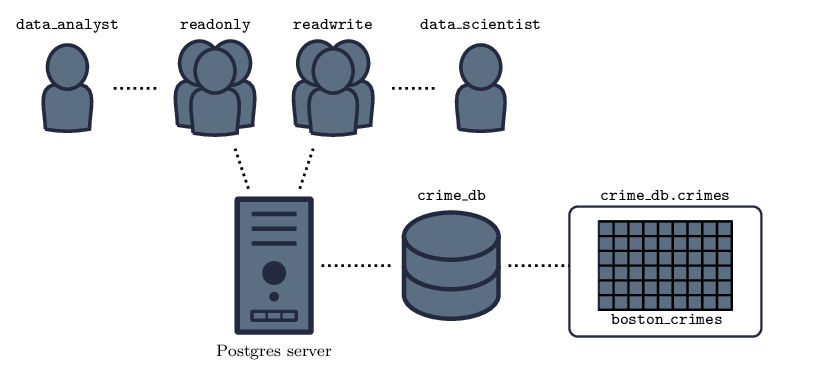

**Tasks**

To help readers gain context into your project, use the first Markdown cell of the notebook to do the following:
* Add a title
* Write a short introduction explaining the project to readers

**Crimes in Boston**

Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes incident number,offence code,description, date of week, day of week, latitude and longitude.

We will create a postgres database that will will store the following.
Incident_number,offence_code,descriptions of crimes,date,day_of_the_week and location intesection for latitude and longitude.

## 2. Creating the Crime Database

We will start by creating a database for storing our crime data as well as a schema for containing the tables. You can create a database using the following command:

```
CREATE DATABASE database_name;
```

Remember that, in order to create a database, you need to set the `connection.autocommit` to `True`.

Inside this database, we will create a schema to keep our data organized. To create a schema, you can use the following command:

```
CREATE SCHEMA schema_name;
```

The following diagram illustrates what the database should look like. We should have a new database named `crime_db-yourname` and a schema in it named `crimes`. NB: While you'll use `crime_db-yourname`, we'll refer to that bases in other parts of this notebook as `crime_db`.


When you connect to the Postgres server (the server that we used during the workshops), you need to specify a database name. Since the `crime_db-yourname` doesn't exist yet, you can create it by connecting to the `dq` database. You can use the postgres user throughout this project.

**Tasks**

* Connect to the `dq` database with user postgres, and create a new database named `crime_db-yourname`.
* Disconnect from the `dq` database.
* Connect to the `crime_db-yourname` with user `postgres`. You can keep this connection open until the end of the  project.
* Create a schema named `crimes`.

In [1]:
pip install psycopg2

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


In [2]:
import psycopg2

In [3]:
# Challenge 
# ---
#we import the library PostgreSQL database adapter for the Python
import psycopg2
#we create a connection to the database.
conn = psycopg2.connect(host="127.0.0.1", port=5432, dbname="nelson", user='postgres',password="yf2?>:"}|_(G&*^SbyU$@zTg5@")
conn.autocommit = True
cur = conn.cursor()

#cur.execute("CREATE DATABASE crime_db-nelson;")
conn.autocommit = False
#step 2
conn.close()#close the connection
#step 3
conn = psycopg2.connect(host="127.0.0.1", port=5432, dbname="crime_db-nelson", user='postgres',password="yf2?>:"}|_(G&*^SbyU$@zTg5@")

#step 4
cur = conn.cursor()

#Create a schema named crimes
#cur.execute("CREATE SCHEMA crimes;")
conn.commit()

## 3. Obtaining the Column Names and Sample


We now have a database and a schema — we're ready to start creating tables. Before we do that, let's gather some data about our crime dataset so that we can easily select the right datatypes to use in our table.

Let's start by reading the column names from the `boston.csv` file as well as the first row. This way, we will have them at hand throughout this project so we can easily refer to them.

We can read a CSV file by using the `csv` module as follows:

```
import csv
with open(csv_filename) as file:
    reader = csv.reader(file)
```

**Tasks**
1. Open the `boston.csv` file.
2. Assign the header row to a variable named `col_headers`.
3. Assign the first data row to a variable named `first_row`.


In [4]:
import pandas as pd

In [5]:
boston_df = pd.read_csv('boston.csv')

In [6]:
boston_df.reset_index(drop =True,inplace =True)
#boston_df=boston_df.drop('Unamed:0',axis =1)
boston_df.head()

,incident_number,offense_code,description,date,day_of_the_week,lat,long
0,1,619,LARCENY ALL OTHERS,2018-09-02,Sunday,42.357791,-71.139371
1,2,1402,VANDALISM,2018-08-21,Tuesday,42.306821,-71.060300
2,3,3410,TOWED MOTOR VEHICLE,2018-09-03,Monday,42.346589,-71.072429
3,4,3114,INVESTIGATE PROPERTY,2018-09-03,Monday,42.334182,-71.078664
4,5,3114,INVESTIGATE PROPERTY,2018-09-03,Monday,42.275365,-71.090361


In [7]:
#def create_staging_table(cursor)

In [8]:
import csv

rows = []
with open('boston.csv','r') as file:
    reader = csv.reader(file)
    for row in reader:
      rows.append(row)

In [9]:
#Assign the header row to a variable named col_headers.
col_headers = rows[0]
#Assign the first data row to a variable named first_row
first_row = rows[1]

print(col_headers)
print(first_row)


['incident_number', 'offense_code', 'description', 'date', 'day_of_the_week', 'lat', 'long']
['1', '619', 'LARCENY ALL OTHERS', '2018-09-02', 'Sunday', '42.35779134', '-71.13937053']


## 4. Creating an Auxillary Function

We now have access to the column headers and the first row of data. This will help us when we create the table. We won't have to remember the names of the columns, and using the first row of data, we can easily recall what kind of data is in each column.

Before we create a table to store the crime data, we need to identify the proper datatypes for the columns. To help us with that, let's create a function — `get_col_set()` — that, given the name of a CSV file and a column index (starting at 0), computes a Python set with all distinct values contained in that column.

For instance, imagine that the entire `boston.csv` dataset just contains the following four rows:

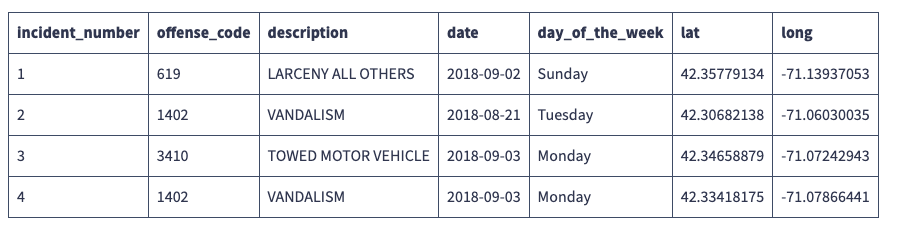

Calling get_col_set() on the third (index 2) column should return the following:

```
get_col_set("boston.csv", 2)
```

```
{"LARCENY ALL OTHERS", "VANDALISM", "TOWED MOTOR VEHICLE"}
```

This function will be useful for two reasons:

* Checking whether an enumerated datatype might be a good choice for representing a column.
* Computing the maximum length of any text-like column to select appropriate sizes for `VARCHAR` columns.

Let's compute the number of different values in each column of the boston.csv file.

**Tasks**

1. Create a function `get_col_set(csv_filename, col_index)` with the following:
* Two inputs: `csv_filename`: the name of a CSV file. `col_index`: the index of a column of that CSV file.
* One output: a Python set that contains all distinct values from that column.
2. Using a for loop and the `get_col_set()` function to compute, for each of the seven columns (indexes 0 to 6), the number of different values it contains. You can use the `len` function to obtain the number of elements in a set.


In [10]:
# Challenge 
def get_col_set(csv_filename, col_index):
  with open(csv_filename, 'r') as f:
    next(f) 
    reader = csv.reader(f)
  
    unique_words_in_col = set()
    for row in reader:
       word_in_col = row[col_index]
       unique_words_in_col.add(word_in_col)
    return unique_words_in_col
display(get_col_set('boston.csv', 4))
col_values = [len(get_col_set('boston.csv', i)) for i in range(0,7)]
display(col_values)   

{'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'}

[298329, 219, 239, 1177, 7, 18177, 18177]

## 5. Finding the Maximum Length

With the function from the previous screen, we can compute the number of distinct values for each column. Columns with a low number of distinct values tend to be good candidates for enumerated datatypes. Ultimately, we will let you be the judge of which datatype to use for each column.

Another important aspect is to know the longest word in any column containing textual data. We can actually use the previous function for computing this:

1. Use the `get_col_set()` function to get the distinct values of that column into a variable named `col_values`.
2. Iterate over the elements of `col_values`, and find the longest one.

There are two textual columns in the dataset, namely, the `description` and `day_of_the_week` columns. However, the day of the week contains only seven values — one for each day. We can tell that the longest of them is Wednesday without any computation.

Let's compute the maximum length of each value in the description column.

**Tasks**

* Print the value of `col_headers` to see which index the description column is.
* Using the function `get_col_set()`, compute the maximum length of any value in the description column.


In [11]:
# Challenge 
# ---
#
display(col_headers)

#Using the function get_col_set(), compute the maximum length of any value in the description column.

col_values = get_col_set('boston.csv', 2)
max_len = 0
for value in col_values:
    max_len = max(max_len, len(value))
print(max_len)

['incident_number',
 'offense_code',
 'description',
 'date',
 'day_of_the_week',
 'lat',
 'long']

58


## 6. Creating the Table

Create a table named boston_crimes inside the crimes schema of the crime_db database. The syntax to create table_name inside a schema named schema_name is as follows:

```
CREATE TABLE schema_name.table_name (
    col1_name col_1_type PRIMARY KEY,
    col2_name col_2_type,
    col3_name col_3_type
);
```

Use the information from the two previous screens and what you have learned in this course to select the appropriate datatypes.

If you feel that a column is suited to have an enumerated datatype, create that datatype before creating the table. You can create an enumerated datatype with four string values, like so:

```
CREATE TYPE enum_type_name AS ENUM ('value_1', 'value_2', 'value_3', 'value_4');
```

Let's create a table to store the Boston crime data. Recall the information that we have gathered on the two previous lessons — namely, the number of different values of each column and the maximum length of the string columns.

**Tasks**

* Print the value of `col_headers` to identify suitable column names for your table.
* Print the value of `first_row` to remember the kind of data contained in each column. If you feel the need to see more rows, use the csv module to print the first few rows in the `boston.csv` file.
* Write a markdown cell describing your choices.
* If you feel that some columns are suitable to be an enumerated datatype, create those datatypes.
* Create a table `crimes.boston_crimes` with the appropriate column names and datatypes.


In [12]:
# Challenge 
# ---
#
import psycopg2
#we create a connection to the database.
conn = psycopg2.connect(host="127.0.0.1", port=5432, dbname="nelson", user='postgres',password="yf2?>:"}|_(G&*^SbyU$@zTg5@")
conn.autocommit = True
cur = conn.cursor()
#  Print the value of col_headers to identify suitable column names for your table.
print(col_headers)

# Step 2 Print the value of first_row to remember the kind of data contained in each column. 
#If you feel the need to see more rows, use the csv module to print the first few rows in the boston.csv file.
print(first_row)
print(get_col_set('boston.csv', 4))

['incident_number', 'offense_code', 'description', 'date', 'day_of_the_week', 'lat', 'long']
['1', '619', 'LARCENY ALL OTHERS', '2018-09-02', 'Sunday', '42.35779134', '-71.13937053']
{'Monday', 'Thursday', 'Sunday', 'Tuesday', 'Wednesday', 'Saturday', 'Friday'}


In [13]:
#Write a markdown cell describing your choices.
day_enum_query = """
    CREATE TYPE day_enum AS ENUM (
    'Friday', 'Sunday', 'Monday', 'Saturday', 'Wednesday', 'Thursday', 'Tuesday');
"""

#cur.execute(day_enum_query)

conn.commit()

#If you feel that some columns are suitable to be an enumerated datatype, create those datatypes.
row_no = [0,1,5,6]
row_maxs = [max(get_col_set('boston.csv', i)) for i in row_no]
print(row_maxs)
row_mins = [min(get_col_set('boston.csv', i)) for i in row_no]
print(row_mins)

['99999', '900', '42.39504158', '-71.17867378']
['1', '1001', '42.2324133', '-70.96367615']


In [14]:
import psycopg2
#we create a connection to the database.
conn = psycopg2.connect(host="127.0.0.1", port=5432, dbname="nelson", user='postgres',password="yf2?>:"}|_(G&*^SbyU$@zTg5@")
conn.autocommit = True
cur = conn.cursor()

#cur.execute("CREATE DATABASE crime_db_nelson;")
conn.autocommit = False
#step 2
conn.close()#close the connection
#step 3
conn = psycopg2.connect(host="127.0.0.1", port=5432, dbname="crime_db-nelson", user='postgres',password="yf2?>:"}|_(G&*^SbyU$@zTg5@")

#step 4
cur = conn.cursor()

#Create a schema named crimes
#cur.execute("CREATE SCHEMA crimes;")
conn.commit()

In [15]:
#Create a table crimes.boston_crimes with the appropriate column names and datatypes
create_table_query = """
    CREATE TABLE crimes.boston_crimes (
    incident_number serial PRIMARY KEY,
    offense_code smallint,
    description varchar(58),
    date date,
    day_of_the_week day_enum,
    lat decimal(10,8),
    long decimal(10,8)
); """

#cur.execute(create_table_query)
conn.commit()

## 7. Loading the Data

Now that we have created the table, we can load the data into it.

There are many ways to load CSV data into a Postgres table. Feel free to use the one you feel is the most suitable. We suggest using the `cursor.copy_expert()` method. Remember that, in general, you can use this method like so:

```
with open("filename.csv") as f:
    cur.copy_expert("COPY table_name FROM STDIN WITH CSV HEADER;", f)
```

After this step, the database should look like this:

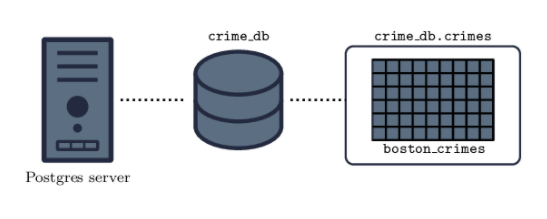

**Tasks**

* Load the data from the `boston.csv` file into the `crimes.boston_crimes` table.

In [17]:
# Challenge 
# ---
#
with open("boston.csv") as f:
   cur.copy_expert("COPY crimes.boston_crimes FROM STDIN WITH CSV HEADER;", f)
conn.commit()

In [18]:
#our data
def create_crimes_boston_crimes_table(cursor):
    cursor.execute("""
    DROP TABLE IF EXISTS crimes_boston_crimes CASCADE; CREATE
    UNLOGGED TABLE crimes_boston_crimes(
    incident_number serial PRIMARY KEY,
    offense_code        smallint,
    description         varchar(58),
    date                date,
    day_of_the_week     day_enum,
    lat                 decimal(10,8),
    long                decimal(10,8)
    );
    """)

## 8. Revoking Public Privilages

Our database is starting to look good! We have created a database with a schema inside it to hold data about crimes. We selected the right datatypes for storing the data, created a table, and loaded the CSV containing crimes about Boston.

Now it's time to handle users. Our goal is to create the two user groups that we have learned about: `readonly` and `readwrite`. By following the least privilege principle, the first step in doing so is to make sure that there are no privileges inherited from the public group and on the public schema.

You can do this by issuing the following two commands:

```
REVOKE ALL ON SCHEMA public FROM public;

REVOKE ALL ON DATABASE database_name FROM public;
```

**Tasks**

While connected to the `crime_db` database, do the following:

* Revoke all the privileges of the `public` group on the `public` schema.
* Revoke all privileges of public on the `crime_db` database.


In [19]:
# Challenges
# ---
#
# REVOKE ALL ON SCHEMA public FROM public;
cur.execute("REVOKE ALL ON SCHEMA public FROM public;")

#REVOKE ALL ON DATABASE database_name FROM public;
cur.execute("REVOKE ALL ON DATABASE crime_db-nelson FROM public;")

conn.commit()

## 9. Creating User Groups

We've made sure that we aren't going to inadvertently inherit privileges from the public group. The next step is to create our two user groups.

The syntax to create a user group is as follows:

```
CREATE GROUP group_name NOLOGIN;
```

The `readonly` group is supposed to only have privileges to perform `SELECT` queries. In contrast, we want the readwrite group to be able to perform `SELECT`, `INSERT`, `DELETE`, and `UPDATE` queries. To grant `INSERT` and `SELECT` privileges in all tables inside a schema, we can use the following command:

```
GRANT INSERT, SELECT ON ALL TABLES IN SCHEMA schema_name TO group_name;
```

Both of these uses will also need the following:

Connection privileges on the crime_db — otherwise, they won't be able to do anything. To grant connection privileges you can use the following:

```
GRANT CONNECT ON DATABASE database_name TO group_name;
```

Usage of the crimes schema — this is where all data will be stored. Recall that you can grant usage like so:

```
GRANT USAGE ON SCHEMA schema_name TO group_name;
```

**Tasks**
While connected to the `crime_db` database, do the following:

1. Create two groups named readonly and readwrite with the no `NOLOGIN` option.
2. Grant CONNECT to the crime_db to both groups.
3. Grant USAGE to the crimes schema to both groups.
4. Grant group specific privileges to each group on all tables in the crimes schema. 
* You can use `ALL TABLES IN SCHEMA` crimes to target all tables.
* The readonly group should only be granted the `SELECT` privilege.
* The readwrite group should be granted the `SELECT`, `INSERT`, `DELETE`, and `UPDATE` privileges.




In [20]:
import psycopg2
conn = psycopg2.connect(host="127.0.0.1", port=5432, dbname="nelson", user='postgres',password="yf2?>:"}|_(G&*^SbyU$@zTg5@")
cur = conn.cursor()
conn.commit()


In [21]:

# Task 1
cur.execute("CREATE GROUP crimesreadonly NOLOGIN;")
cur.execute("CREATE GROUP crimesreadwrite NOLOGIN;")

# Task 2
cur.execute("GRANT CONNECT ON DATABASE crime_db-nelson TO crimesreadonly;")
cur.execute("GRANT CONNECT ON DATABASE crime_db-nelson TO crimesreadwrite;")

# Task 3
cur.execute("GRANT USAGE ON SCHEMA crimes TO crimesreadonly;")
cur.execute("GRANT USAGE ON SCHEMA crimes TO readwrite;")

# Task 4
cur.execute("GRANT SELECT ON ALL TABLES IN SCHEMA crimes TO crimesreadonly;")
cur.execute("GRANT SELECT, INSERT, DELETE,UPDATE ON ALL TABLES IN SCHEMA crimes TO crimesreadwrite;")

conn.commit()

## 10. Creating Users

We are nearly done with setting up our crime database. The only thing that we need to do is create users. Right now, the high-level picture of our database looks like this:

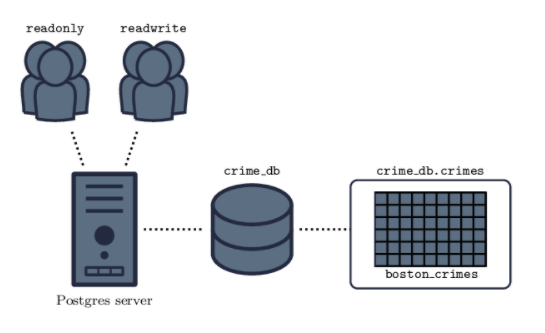

Let's finish the project by creating one user in each group. We will need to create each user and then assign them to each group. You can create a user using the following command:

```
CREATE USER user_name WITH PASSWORD 'some_password';
```

While connected to the crime_db database, do the following:

* Create a user named `data_analyst` with password `secret1`.
* Assign this user to the readonly group using the `GRANT` command.
* Create a user named `data_scientist` with password `secret2`.
* Assign this user to the `readwrite` group using the `GRANT` command.


In [22]:
# Challenge 
# ---
#
# Create a user named data_analyst with password secret1.

cur.execute("CREATE USER data_analyst WITH PASSWORD 'secret1';")

# Assign this user to the readonly group using the GRANT command.
cur.execute("GRANT crimesreadonly TO data_analyst;")

# Create a user named data_scientist with password secret2.
cur.execute("CREATE USER data_scientist WITH PASSWORD 'secret2';")

# Assign this user to the readwrite group using the GRANT command.
cur.execute("GRANT crimesreadwrite TO data_scientist;")

conn.commit()

## 11. Testing

Congratulations on setting up your first Postgres database! Your database should now look like this:

It's a good practice to test that everything is configured as expected when you finish setting up the database. We can query Postgres internal tables to see this information.

We can use SQL queries to check whether the objects have been created and that users and groups have the right privileges. This requires you to know the Postgres internal tables. We can query the `pg_roles` table to inspect privileges related to the database and the `information_schema.table_privileges` table to inspect table privileges.

For instance, we can check the privileges of the readwrite group with the following query:

```
SELECT grantee, privilege_type
    FROM information_schema.table_privileges
    WHERE grantee = 'readwrite';
```

**Tasks**

* Write tests for checking that privileges are set accordingly. See above for suggested ways of doing this. Feel free to explore them and maybe come up with your own.

* It is always very instructive to check how others solved the same problem. Once you are happy with your work, check our solution.


In [24]:
# Challenge 
# ---
#
# Task 1
test_query = """
SELECT grantor, grantee, privilege_type 
FROM information_schema.table_privileges 
where table_name = 'boston_crimes';
"""

#cur.execute(test_query)

privileges = cur.fetchall()

for row in privileges:
  print(row)

## 12. Next Steps

Congratulations on setting up your Postgres database! We encourage you to set up your own Postgres database. This is probably what you want to do if you are making applications that other people are going to use. These solutions include the following:

* [Postgres on AWS](https://aws.amazon.com/getting-started/tutorials/create-connect-postgresql-db/)